<img src="https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/imagens/logo_nlportugues.png"   width="150" align="right">


# Neural Networks (basics)  - Curso NLP (USP)


- **nome arquivo original**: Lista 2 - NN & Backpropagation
- **descrição**: Lista de Exercicios 2 - Curso NLP (USP)
- **notes**: básico em redes neurais.


_________________________________________

Antes de começar o exercício,  não se esqueça de instalar todos os pacotes necessários para a sua execução.  

In [18]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline
tf.__version__

'2.17.1'

## Perceptron

O perceptron é uma "rede neural" de um só neurônio.  No nosso caso, temos a rede mais simples possível, com uma só entrada e uma só saída, sem ativação.

Temos 100 dados que serão usados para treinar 300 épocas do percéptron.

Vamos utilizar o modelo percéptron para aprender uma simples regressão linear, o objetivo é faze-lo aprender uma simples equação linear e tambem se acostumar com a sintaxe e funcionamento do TensorFlow


In [44]:
def f1(x):
    '''
    Funcao a ser aprendida
    '''
    return 5 + 10*x

In [45]:
xs = np.linspace(0,10,100)  # gera 100 valores no intervalo [0.10]
ys = f1(xs)                 # computa o valor de f1 nestes 100 valores
print(len(xs), "xs=", xs)
print(len(ys), "ys=", ys)

100 xs= [ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.181

In [46]:
#Definindo, compilando e treinando nosso modelo
model = tf.keras.Sequential([
    keras.Input(shape=(1,)),
    keras.layers.Dense(units=1),
])

#model.compile(optimizer="sgd", loss="mean_squared_error") #results: loss: 1.9859e-05 / 1.7836679035099223e-05
model.compile(optimizer="adam", loss="mean_squared_error") #results: loss: 2683.4878 / 3528.87890625
model.fit(xs,ys,epochs=300)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4601.9214  
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4412.7334 
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4719.3218 
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4596.8140 
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4456.2671 
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4156.0957 
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4573.7246 
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4669.9966 
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4427.2373 
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4616.2866 
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4449.2056 
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4366.5869 
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4105.1860 
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4447.6938 
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4

In [47]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6 (28.00 B)

In [48]:
#print("prediction: "+ str(model.predict([17]))+"      real value: " + str(f1(17))) # (cod.original) vai dar erro pq ele recebeu uma lista python [17] enquanto esperava um array
print("prediction: "+ str(model.predict(np.array([17])))+"      real value: " + str(f1(17)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
prediction: [[6.7693005]]      real value: 175


In [49]:
val = np.linspace(0,10,63)
model.evaluate(x=val, y=f1(val))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2683.4878 


3528.87890625

A função `evaluate` retorna o "custo" (loss) da avaliação, definido na compilação.  Nesse caso, o valor reportado é o erro quadrático médio (MSE).

## Aprendendo uma função não linear

In [25]:
def f2(x):
    '''
    Funcao não linear a ser aprendida
    '''
    return (x**2 + x*3 + 4)/200

In [26]:
x = np.linspace(0,10,100)
y = f2(x)

# <font color='blue'>Questão 1 </font>
Defina as camadas para esta rede neural e treine seu modelo, note que a saída unitária _não deve_ ter função de ativação (por que?).

resposta:

In [27]:
model = tf.keras.Sequential([
    keras.Input(shape=(1,)),  # Entrada com uma única variável (dimensão 1)
    keras.layers.Dense(10, activation="relu"), # Camada densa com 10 neurônios e ativação ReLU
    keras.layers.Dense(5, activation="relu"), # Camada densa com 5 neurônios e ativação ReLU
    keras.layers.Dense(1) # Saída unitária sem função de ativação
])

model.compile(optimizer="adam", loss="mean_squared_error") # Configura o otimizador e a função de perda
model.fit(x,y,epochs=400) # Treina o modelo com os dados x e y por 400 épocas

Epoch 1/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5634  
Epoch 2/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5141 
Epoch 3/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4062 
Epoch 4/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3309 
Epoch 5/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2881 
Epoch 6/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2168 
Epoch 7/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1898 
Epoch 8/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1559 
Epoch 9/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1206 
Epoch 10/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1063 
Epoch 11/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1038 
Epoch 12/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0992 
Epoch 13/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0986 
Epoch 14/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1031 
Epoch 15/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0999 
Epoch 16/400
4/4 ━

In [28]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)

In [29]:
x_val = np.linspace(0,10,63)
y_val = f2(x_val)

In [30]:
model.evaluate(x=x_val,y=y_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.2563e-04 


0.0005707183736376464

____________________________
# <font color='blue'>Questão 2 </font>



O que acontece se você muda as funções de ativação? Teste algumas diferentes e descreva seus resultados, em especial a tangente hiperbólica



Comparativo

|fAtiv| score | loss|
|-----|------|-----|
|reLu|0.00057071|5.2563e-04 |
|tanh|0.000276188|2.6558e-04 |
|sigmoide|0.001760652 | 0.0016|
|leakRelu| 0.000472404935 | 3.9384e-04 |

A função tangente hiperbólica apresentou o menor erro; este resultado pode ser explicado pela capacidade da tangente hiperbólica de lidar bem com entradas simétricas e centradas em zero, características que podem estar relacionadas aos dados utilizados na validação. A função sigmoide apresentou taxa de erro altíssima em comparação às outras funções.









**Tanh**

In [31]:
# Modelo com tanh como função de ativação
model = tf.keras.Sequential([
    keras.Input(shape=(1,)),         # Entrada unidimensional
    keras.layers.Dense(10, activation="tanh"),  # Camada oculta com tangente hiperbólica
    keras.layers.Dense(5, activation="tanh"),   # Outra camada oculta com tangente hiperbólica
    keras.layers.Dense(1)           # Saída unitária sem ativação
])

# Compilação do modelo
model.compile(optimizer="adam", loss="mean_squared_error") # Configura o otimizador e a função de perda
model.fit(x,y,epochs=400) # Treina o modelo com os dados x e y por 400 épocas

Epoch 1/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1337  
Epoch 2/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1044 
Epoch 3/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0729 
Epoch 4/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0590 
Epoch 5/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0475 
Epoch 6/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0472 
Epoch 7/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0433 
Epoch 8/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0383 
Epoch 9/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0340 
Epoch 10/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0310 
Epoch 11/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0251 
Epoch 12/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0271 
Epoch 13/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0224 
Epoch 14/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0231 
Epoch 15/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 
Epoch 16/400
4/4 ━

In [32]:
x_val = np.linspace(0,10,63)
y_val = f2(x_val)

In [33]:
model.evaluate(x=x_val,y=y_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.6558e-04 


0.00027618854073807597

**Sigmoide**

In [37]:
# Modelo com SIGMOIDE como função de ativação
model = tf.keras.Sequential([
    keras.Input(shape=(1,)),         # Entrada unidimensional
    keras.layers.Dense(10, activation="sigmoid"),  # Camada oculta com tangente hiperbólica
    keras.layers.Dense(5, activation="sigmoid"),   # Outra camada oculta com tangente hiperbólica
    keras.layers.Dense(1)           # Saída unitária sem ativação
])

# Compilação do modelo
model.compile(optimizer="adam", loss="mean_squared_error") # Configura o otimizador e a função de perda
model.fit(x,y,epochs=400) # Treina o modelo com os dados x e y por 400 épocas

Epoch 1/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1556  
Epoch 2/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1455 
Epoch 3/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1398 
Epoch 4/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1162 
Epoch 5/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1094 
Epoch 6/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0994 
Epoch 7/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0834 
Epoch 8/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0709 
Epoch 9/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0599 
Epoch 10/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0579 
Epoch 11/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0505 
Epoch 12/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0467 
Epoch 13/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0395 
Epoch 14/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0348 
Epoch 15/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0340 
Epoch 16/400
4/4 ━

In [38]:
x_val = np.linspace(0,10,63)
y_val = f2(x_val)

In [39]:
model.evaluate(x=x_val,y=y_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016  


0.0017606528708711267

**Leak ReLU**

In [40]:
# Modelo com Leaky ReLU como função de ativação
model = tf.keras.Sequential([
    keras.Input(shape=(1,)),         # Entrada unidimensional
    keras.layers.Dense(10, activation="leaky_relu"),  # Camada oculta com tangente hiperbólica
    keras.layers.Dense(5, activation="leaky_relu"),   # Outra camada oculta com tangente hiperbólica
    keras.layers.Dense(1)           # Saída unitária sem ativação
])

# Compilação do modelo
model.compile(optimizer="adam", loss="mean_squared_error") # Configura o otimizador e a função de perda
model.fit(x,y,epochs=400) # Treina o modelo com os dados x e y por 400 épocas

Epoch 1/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10.3192  
Epoch 2/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3646 
Epoch 3/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4725 
Epoch 4/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.7078 
Epoch 5/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.6146 
Epoch 6/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6177 
Epoch 7/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5338 
Epoch 8/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9068 
Epoch 9/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5588 
Epoch 10/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7335 
Epoch 11/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3416 
Epoch 12/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9049 
Epoch 13/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7297 
Epoch 14/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2905 
Epoch 15/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9512 
Epoch 16/400
4/4 

In [41]:
x_val = np.linspace(0,10,63)
y_val = f2(x_val)

In [42]:
model.evaluate(x=x_val,y=y_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9384e-04 


0.000472404935862869


**<font color='red'> Sua resposta aqui </font>**


O que acontece se você mudar a função de otimização? Teste diferentes funções e descreva seus resultados, em especial as funções SDG e RMSprop


In [43]:
# Função para treinar o modelo com diferentes otimizadores
def train_with_optimizer(optimizer_name):
    print(f"Treinando com {optimizer_name}")
    model = tf.keras.Sequential([
        keras.Input(shape=(1,)),
        keras.layers.Dense(10, activation="tanh"),
        keras.layers.Dense(5, activation="tanh"),
        keras.layers.Dense(1)
    ])


    # Compilação do modelo com otimizador escolhido
    model.compile(optimizer=optimizer_name, loss="mean_squared_error")

    # Treinamento do modelo
    model.fit(x,y,epochs=400)

    # Avaliação em conjunto de validação
    x_val = np.linspace(0,10,63)
    y_val = f2(x_val)
    results = model.evaluate(x=x_val,y=y_val)

    return results

# Testando diferentes otimizadores
optimizers = ['SGD', 'RMSprop', 'Adam', 'Adagrad']
results = {opt: train_with_optimizer(opt) for opt in optimizers}

# Exibindo os resultados
for opt, loss in results.items():
    print(f"{opt}: Loss = {loss:.6f}")

Treinando com SGD
Epoch 1/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4821  
Epoch 2/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4848 
Epoch 3/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0653 
Epoch 4/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0141 
Epoch 5/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0081 
Epoch 6/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0067 
Epoch 7/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0067 
Epoch 8/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0064 
Epoch 9/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060 
Epoch 10/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056 
Epoch 11/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055 
Epoch 12/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0057 
Epoch 13/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047 
Epoch 14/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044 
Epoch 15/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0054 



**<font color='red'> Sua resposta aqui </font>**

AS melhores funções foram a RMSprop (loss=0.000112) e a Adam (loss=0.000154).

Volte a primeira parte desse notebook e troque a função de ativação da rede de uma camada (pérceptron) de sdg para adam, o que acontece?




**<font color='red'> Sua respostg: a aqui </font>**

Com Adam: Houve um salto no erro: loss: 2683.4878 / 3528.87890625

sgd: loss: 1.9859e-05  / 1.7836679035099223e-05

**Interpolação & Extrapolação**

A avaliação de performance que realizamos foi apenas para pontos contidos no mesmo intervalo que o conjunto de treino, ou seja, foi apenas uma interpolação. Sem alterar sua rede repita o teste realizando uma **extrapolação**, com pontos fora do intervalo [0;10] e descreva seus resultados. O que aconteceu com a performance?

In [50]:
# Seu código aqui
model = tf.keras.Sequential([
    keras.Input(shape=(1,)),         # Entrada unidimensional
    keras.layers.Dense(10, activation="tanh"),  # Camada oculta com tangente hiperbólica
    keras.layers.Dense(5, activation="tanh"),   # Outra camada oculta com tangente hiperbólica
    keras.layers.Dense(1)           # Saída unitária sem ativação
])

# Compilação do modelo
model.compile(optimizer="adam", loss="mean_squared_error") # Configura o otimizador e a função de perda
model.fit(x,y,epochs=400) # Treina o modelo com os dados x e y por 400 épocas

Epoch 1/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0230
Epoch 2/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0178  
Epoch 3/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 
Epoch 4/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0147  
Epoch 5/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155  
Epoch 6/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0119 
Epoch 7/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114  
Epoch 8/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105  
Epoch 9/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102 
Epoch 10/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090  
Epoch 11/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093  
Epoch 12/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086  
Epoch 13/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083  
Epoch 14/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0070 
Epoch 15/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068  
Epoch 16/4

In [51]:
x_val = np.linspace(0,20,200) #chute
y_val = f2(x_val)

In [52]:
model.evaluate(x=x_val,y=y_val)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0629      


0.17234617471694946


**<font color='red'> Sua resposta aqui </font>**

O erro aumentou muito em comparação ao resultado interpolado.


# Prevendo se vai chover na Austrália

Os próximos exercícios são, em grande parte, uma tradução e adaptação para o português brasileiro do tutorial intitulado [Build Your First Neural Network with Pytorch](https://curiousily.com/posts/build-your-first-neural-network-with-pytorch/)
 entretanto algumas adaptações foram realizadas, tanto no texto, quanto no código, em relação à versão original para utilizar a biblioteca TensorFlow.

Aqui você aprenderá como implementar, treinar e utilizar uma Rede Neural *Feed-Foward* simples para uma tarefa de classificação binária.

Para tal, utilizaremos o pacote [TensorFlow 2.0](www.tensorflow.org) que é, atualmente, uma das principais ferramentas para a implementação de modelos neurais viáveis.

A tarefa que usaremos para fins de exemplo será a de prever se choverá ou não numa cidade australiana amanhã, utilizando dados meteorológicos mensurados na mesma cidade no dia de hoje. A redução dessa tarefa de previsão a uma classificação binária é, evidentemente, uma grande simplificação do problema real de previsão meteorológica, mas como veremos, ainda pode apresentar resultados interessantes, além do caráter didático.



As informações que utilizaremos para treinar nosso modelo para a tarefa de previsão de chuvas estão contidas num conjunto que reúne dados meteorológicos de diversas cidades australianas. Esse conjunto de dados foi curado e disponibilizado através do [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) por [Joe Young](https://www.kaggle.com/jsphyg).



In [53]:
!mkdir data

In [54]:
# Baixando os dados:
!curl https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/Semana%2002/data/weatherAUS.csv --output 'data/weatherAUS.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.5M  100 13.5M    0     0  20.3M      0 --:--:-- --:--:-- --:--:-- 20.3M


Os dados estão no formato `.csv` e, com eles em mãos, o primeiro passo é carregá-los em um *data-frame*, usando a função [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) do *pandas*.


Com os dados carregados, é possível averiguar que eles são constituídos por 142193 entradas, cada uma contando com 24 variáveis distintas. É possível notar, também, que existem entradas para as quais nem todas as variáveis estão  instanciadas. Além disso, nem todos os valores estão nos formatos que gostaríamos que estivessem para serem processados.

Isso é normal. Dados reais são cheios de falhas e problemas, e exigem trabalho e entendimento para serem utilizados da maneira correta. Por isso, é necessário realizar um **pré-processamento** para adequar os dados, antes de os passarmos para o modelo.

O primeiro passo é escolher quais das variáveis meteorológicas nos interessam. No nosso caso, queremos prever se choverá ou não amanhã, então `RainTomorrow` será nossa variável alvo. Para prevê-la usaremos as variáveis  `Rainfall`, `Humidity3pm`, `Pressure9am` e `RainToday`, que serão nossas *features*.



Em seguida, iniciamos o pré-processamento, propriamente dito.

As variáveis `RainToday` e `RainTomorrow` possuem dois valores possíveis, *Yes* e *No*. Adeque esses valores, convertendo-os para $1$ e $0$, respectivamente.




A seguir, remova todas as entradas que não tenham instanciado os valores de todas as variáveis de interesse com a função [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html), pois essas entradas são inúteis para treinar nosso modelo.



Com os dados pré-processados, é possível, agora, plotar as distribuições das variáveis de interesse para poder entender melhor como essas distribuições funcionam. Esse tipo de trabalho é muito importante na implementação real de redes neurais, conhecer os dados é fundamental para tirar o maior proveito do seu modelo e entender verdadeiramente seus resultados.




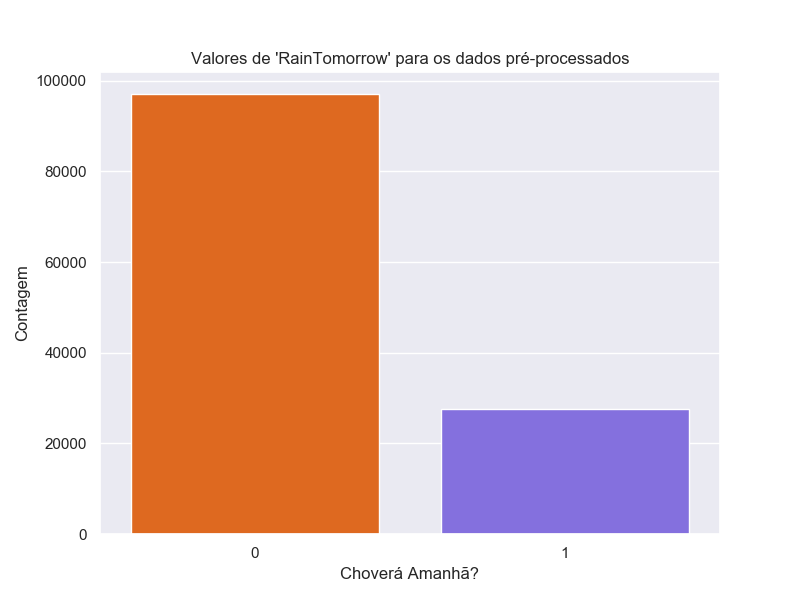



Dentre todas as distribuições das variáveis de interesse, a que mais nos concerne é a da variável alvo, `RainTomorrow`, representada na figura acima.


Essa distribuição nos revela um grande desbalanço entre os dois valores possíveis dessa variável, que constituirão as duas classes do nosso problema de classificação. Esse é um dado importante, pois pode influenciar significativamente a capacidade preditiva do modelo treinado.

Existem maneiras de se lidar com o desbalanceamento dos dados, mas nesse tutorial utilizaremos os dados dessa forma. Isso significa que o *baseline* para a performance do nosso modelo deve ser $78\%$, isso porque, se um modelo chutasse que amanhã não irá chover, todas as vezes, ele obteria uma performance dessa ordem e, como esperamos gerar um modelo mais "inteligente" que isso, esperamos também que a a nossa performance seja superior a essa.

Todo o código referente a esse pré-processamento deve ser escrito pelo próprio aluno seguindo o esqueleto das funções presentes no notebook. Para agilizar a exploração dos dados nós já fornecemos a implementação da função `visualize_data()` que plota visualizações para as distribuições das variáveis de interesse.

In [55]:
def visualize_data(data):
    """Gera graficos das distribuicoes das features"""

    ibm_pltt = ['#648FFF', '#785EF0', '#DC267F',
                '#FE6100', '#FFB000']  # Paleta colorblind-friendly

    # RainToday:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[2], ibm_pltt[0]]))
    sns.countplot(x=data.RainToday)
    plt.xlabel('Choveu Hoje?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainToday' para os dados pré-processados")
    plt.show()

    # RainTomorrow:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[3], ibm_pltt[1]]))
    sns.countplot(x=data.RainTomorrow)
    plt.xlabel('Choverá Amanhã?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainTomorrow' para os dados pré-processados")
    plt.show()

    # Humidity3pm:
    sns.set()
    sns.displot(data.Humidity3pm, color=ibm_pltt[0], stat='density', kde=True)
    plt.xlabel('Umidade às 3PM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Humidity3pm' para os dados pré-processados")
    plt.show()

    # Pressure9am:
    sns.set()
    sns.displot(data.Pressure9am, color=ibm_pltt[4], stat='density', kde=True)
    plt.xlabel('Pressão atmosférica às 9AM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Pressure9amm' para os dados pré-processados")
    plt.show()

    # Rainfall:
    sns.set()
    sns.histplot(data.Rainfall, color=ibm_pltt[1], bins=500, kde=False)
    plt.xlim(0, 10)
    plt.xlabel('Pluviosidade')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Rainfall' para os dados pré-processados")
    plt.show()

    return


## Pré processamento dos dados
Já definimos uma função basica para lhe ajudar a explorar os dados, você precisará escrever uma função para carregar os dados, uma de pré-processamento e outra para fazer a separação em teste e treino.

# <font color='blue'>Questão 3 </font>
Complete as funções aqui descritas seguindo a assinatura sugerida

Para separar em treino e teste, de uma olhada na função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do Scikit-Learn

In [56]:
def load_data(data_path='data/weatherAUS.csv') -> pd.DataFrame:
    """Funcao que importa dados de um arquivo csv, usando pandas"""
    try:
        raw_data = pd.read_csv(data_path)
        print(f"Dados carregados com sucesso. Dimensões: {raw_data.shape}")
    except FileNotFoundError:
        print("Erro: O arquivo não foi encontrado no caminho especificado.")
        raw_data = pd.DataFrame()  # Retorna um DataFrame vazio em caso de erro
    return raw_data

def pre_processing(raw_data: pd.DataFrame) -> pd.DataFrame:
    """Funcao que filtra e limpa os dados meteorologicos para o treinamento"""
    # Remove colunas com mais de 30% de valores faltantes
    threshold = 0.7 * len(raw_data)
    processed_data = raw_data.dropna(axis=1, thresh=threshold)

    # Remove linhas com valores faltantes restantes
    processed_data = processed_data.dropna()

    # Conversão de variáveis categóricas para numéricas (RainToday e RainTomorrow)
    processed_data['RainToday'] = processed_data['RainToday'].map({'Yes': 1, 'No': 0})
    processed_data['RainTomorrow'] = processed_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

    # Remove colunas irrelevantes (como ID ou Name, se existirem)
    if 'Date' in processed_data.columns:
        processed_data = processed_data.drop(columns=['Date'])

    # Filtrando apenas os dados úteis (excluindo nulos após mapeamento)
    processed_data = processed_data.dropna(subset=['RainToday', 'RainTomorrow'])

    return processed_data

def split_data(data: pd.DataFrame, val_size=0.2) -> np.array:
    """Funcao que separa seus dados em teste e treino conforme a proporcao val_size"""
    # Separar as features (X) e a variável-alvo (y)
    X = data.drop(columns=['RainTomorrow'])
    y = data['RainTomorrow']

    # Dividir em conjuntos de treino e validação
    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=42, stratify=y)

    return x_train, x_val, y_train, y_val

Dados carregados com sucesso. Dimensões: (142193, 24)


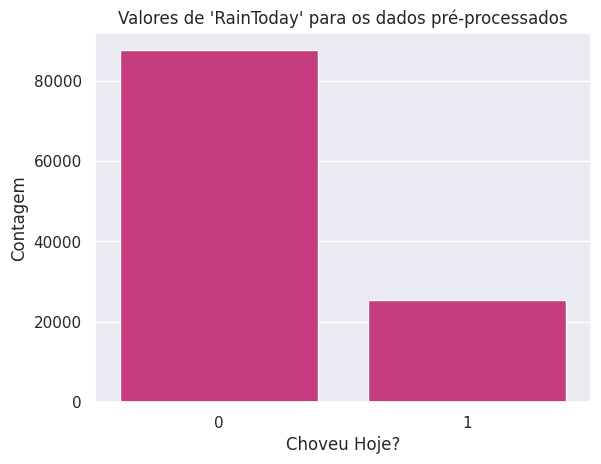

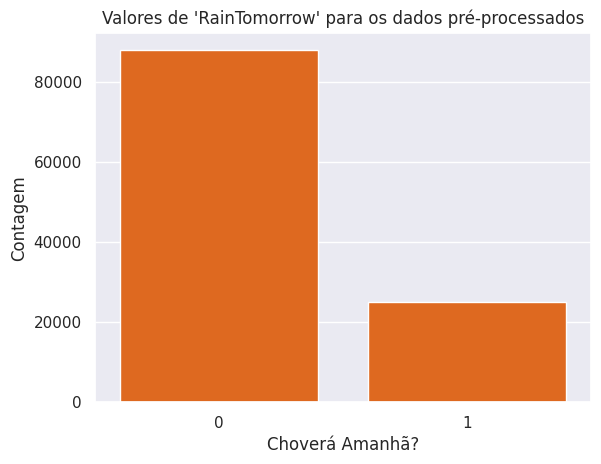

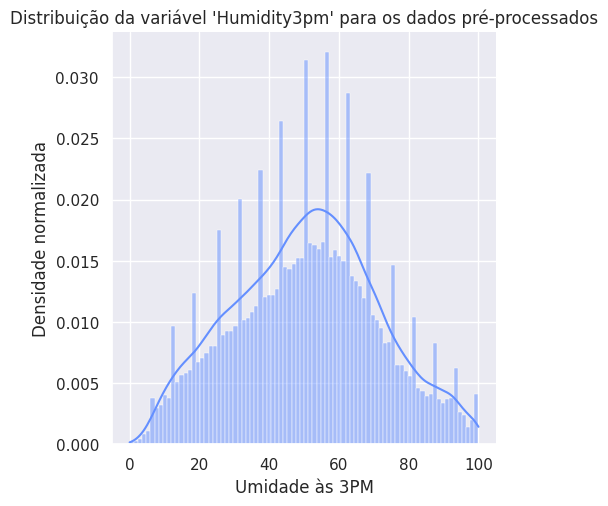

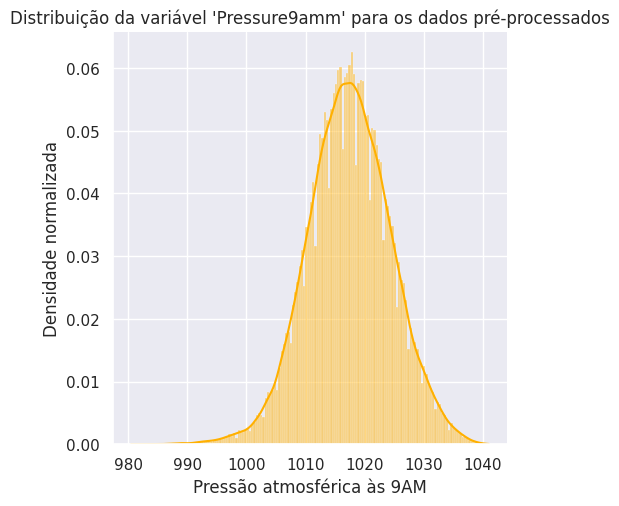

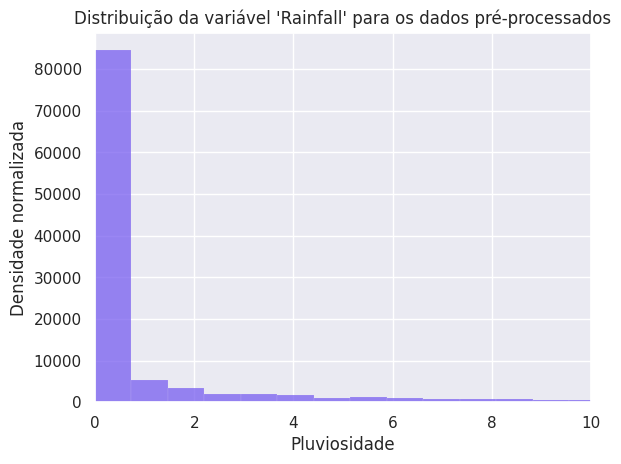

In [57]:
df = load_data()
df = pre_processing(df)
visualize_data(df)
x_train, x_val, y_train, y_val = split_data(df,)

# <font color='blue'>Questão 4 </font>
Agora que você ja ganhou uma familiaridade com a API Keras, escreva sozinho do começo ao fim um modelo que ira dizer se amanhã vai chover ou não e avalie sua performance.


In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Funções auxiliares
def load_data(data_path='data/weatherAUS.csv') -> pd.DataFrame:
    """Carrega os dados de um arquivo CSV."""
    try:
        raw_data = pd.read_csv(data_path)
        print(f"Dados carregados com sucesso. Dimensões: {raw_data.shape}")
    except FileNotFoundError:
        print("Erro: O arquivo não foi encontrado.")
        raw_data = pd.DataFrame()
    return raw_data

def pre_processing(raw_data: pd.DataFrame) -> pd.DataFrame:
    """Pré-processa os dados para treinamento."""
    # Remove colunas com mais de 30% de valores faltantes
    threshold = 0.7 * len(raw_data)
    processed_data = raw_data.dropna(axis=1, thresh=threshold)

    # Remove linhas com valores faltantes restantes
    processed_data = processed_data.dropna()

    # Converte variáveis categóricas binárias para numéricas
    processed_data['RainToday'] = processed_data['RainToday'].map({'Yes': 1, 'No': 0})
    processed_data['RainTomorrow'] = processed_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

    # Identifica colunas categóricas restantes
    categorical_cols = processed_data.select_dtypes(include=['object']).columns

    # Aplica one-hot encoding nas colunas categóricas
    processed_data = pd.get_dummies(processed_data, columns=categorical_cols, drop_first=True)

    # Remove linhas com valores nulos nas variáveis-alvo
    processed_data = processed_data.dropna(subset=['RainToday', 'RainTomorrow'])
    return processed_data

def split_data(data: pd.DataFrame, val_size=0.2):
    """Separa os dados em conjuntos de treino e validação."""
    X = data.drop(columns=['RainTomorrow'])
    y = data['RainTomorrow']
    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=42, stratify=y)
    return x_train, x_val, y_train, y_val

# Carregar e pré-processar os dados
data = load_data()
processed_data = pre_processing(data)
x_train, x_val, y_train, y_val = split_data(processed_data)

# Padronizar os dados
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

# Construção do modelo Keras
model = Sequential([
    Dense(128, input_dim=x_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Saída binária
])

# Compilação do modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_val, y_val))

# Avaliação do modelo
y_pred = (model.predict(x_val) > 0.5).astype("int32")
print("Relatório de classificação:")
print(classification_report(y_val, y_pred))

# Matriz de confusão
print("Matriz de confusão:")
print(confusion_matrix(y_val, y_pred))


Dados carregados com sucesso. Dimensões: (142193, 24)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2824/2824 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.8194 - loss: 0.4225 - val_accuracy: 0.8877 - val_loss: 0.2783
Epoch 2/20
2824/2824 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8987 - loss: 0.2495 - val_accuracy: 0.9148 - val_loss: 0.2204
Epoch 3/20
2824/2824 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.9256 - loss: 0.1858 - val_accuracy: 0.9355 - val_loss: 0.1728
Epoch 4/20
2824/2824 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.9497 - loss: 0.1284 - val_accuracy: 0.9505 - val_loss: 0.1416
Epoch 5/20
2824/2824 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.9661 - loss: 0.0892 - val_accuracy: 0.9592 - val_loss: 0.1266
Epoch 6/20
2824/2824 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.9763 - loss: 0.0631 - val_accuracy: 0.9629 - val_loss: 0.1104
Epoch 7/20
2824/2824 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.9819 - loss: 0.0462 - val_accuracy: 0.9655 - val_loss: 0.1152
Epoch 8/20
2824/2824 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9859 - loss: 0

### Interpretação dos Resultados:

1. **Métrica de Acurácia Global**:
   - A acurácia geral é **97%**, o que significa que o modelo classifica corretamente 97% de todas as amostras no conjunto de validação. Isso indica que o modelo está funcionando bem de maneira geral.

2. **Desempenho por Classe**:
   - Classe 0 (Não vai chover):
     - **Precisão (precision)**: 97%, indicando que 97% das previsões de "não vai chover" estão corretas.
     - **Recall**: 99%, indicando que o modelo consegue identificar quase todas as amostras reais de "não vai chover".
     - **F1-Score**: 98%, uma média harmônica entre precisão e recall, confirmando o ótimo desempenho nessa classe.

   - Classe 1 (Vai chover):
     - **Precisão (precision)**: 97%, indicando que 97% das previsões de "vai chover" estão corretas.
     - **Recall**: 90%, indicando que o modelo perde 10% das amostras reais de "vai chover".
     - **F1-Score**: 93%, menor que o da Classe 0, refletindo o desafio maior em prever chuvas.

3. **Matriz de Confusão**:
   - Verdadeiros Negativos (TN): **17433** (modelo corretamente previu "não vai chover").
   - Falsos Positivos (FP): **148** (modelo previu "vai chover", mas não choveu).
   - Falsos Negativos (FN): **502** (modelo previu "não vai chover", mas choveu).
   - Verdadeiros Positivos (TP): **4502** (modelo corretamente previu "vai chover").
   - Apesar do excelente desempenho na Classe 0, ainda há 502 chuvas não previstas (FN), o que pode ter implicações práticas.

---

### Conclusões:
- **Classe Desbalanceada**:
  - O número de amostras para "não vai chover" (Classe 0) é muito maior que para "vai chover" (Classe 1). Isso pode influenciar o modelo a favorecer previsões de "não vai chover", já que isso reduz a perda global.

- **Desempenho Satisfatório**:
  - O modelo é bom para prever dias sem chuva e tem uma boa precisão para prever chuva, mas há uma ligeira perda de recall na Classe 1, indicando que algumas chuvas reais não estão sendo previstas.

---

### Sugestões para Melhorar:
1. **Ajustar o Peso das Classes**:
   - Utilizar pesos desbalanceados na função de perda para dar maior importância à Classe 1 (chuva).

2. **Aprimorar os Dados**:
   - Verificar e adicionar mais features relevantes (como padrões climáticos sazonais ou históricos).

3. **Ajustar o Threshold**:
   - Reduzir o threshold de 0.5 na função de ativação sigmoid, para priorizar a sensibilidade (recall) da Classe 1.

4. **Cross-Validation**:
   - Testar com validação cruzada para verificar a estabilidade do modelo.

Boa chuva ! 🌧️

In [66]:
print("⏰ Coffee Hour")

⏰ Coffee Hour
